In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics.pairwise import haversine_distances

# Always make it pretty. Always.
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv("data/accidents_2005_to_2007.csv")
df2 = pd.read_csv("data/accidents_2009_to_2011.csv")
df3 = pd.read_csv("data/accidents_2012_to_2014.csv")
traffic = pd.read_csv("data/ukTrafficAADF.csv")

# df12 = pd.concat([df1,df2])
df = pd.concat([df1, df2, df3])

df = df.drop_duplicates(subset=['Accident_Index','Date','LSOA_of_Accident_Location','Time','Longitude','Latitude'], keep='first')

df = df[df.Speed_limit !=15]


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.sort_values('Accident_Index')

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
23615,2.00903E+12,340810.0,555160.0,-2.924253,54.887685,3,3,2,1,16/04/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01019236,2009
24266,2.00903E+12,327840.0,470120.0,-3.105581,54.121863,3,2,2,1,21/05/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01019380,2009
24265,2.00903E+12,319720.0,469030.0,-3.229502,54.110864,3,3,2,2,11/09/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01019141,2009
24264,2.00903E+12,320010.0,470260.0,-3.225393,54.121961,3,3,1,1,11/09/2009,...,Zebra crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01019166,2009
24263,2.00903E+12,344940.0,478020.0,-2.845425,54.194976,3,3,2,1,30/08/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,2,No,E01019341,2009
24262,2.00903E+12,338930.0,555600.0,-2.953649,54.891412,3,2,1,1,15/09/2009,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01019207,2009
24261,2.00903E+12,301160.0,515590.0,-3.528738,54.525933,3,3,3,1,04/09/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,E01019265,2009
24260,2.00903E+12,339610.0,556040.0,-2.943142,54.895449,3,3,2,1,08/09/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01019204,2009
24259,2.00903E+12,340820.0,555140.0,-2.924093,54.887507,3,3,1,1,08/09/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01019211,2009
24258,2.00903E+12,320280.0,469070.0,-3.220948,54.111310,3,3,1,1,16/08/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01019143,2009


In [12]:
df1

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,E01002832,2005
6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002889,2005
8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,...,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005


In [4]:
del df['Police_Force']
del df['Local_Authority_(Highway)']
del df['Local_Authority_(District)']
del df['Pedestrian_Crossing-Human_Control']
del df['Pedestrian_Crossing-Physical_Facilities']
del df['Did_Police_Officer_Attend_Scene_of_Accident']

In [5]:
df.groupby(by='Year')['Number_of_Casualties'].sum()

Year
2005    271000
2006    258395
2007    247775
2009    222137
2010    208644
2011    203941
2012    195721
2013    183667
2014    194469
Name: Number_of_Casualties, dtype: int64

In [6]:
severity_totals = df.groupby('Accident_Severity').size().values
#total is 1,469,963 number of accidents 1469963
severity_mus = severity_totals / severity_totals.sum()
severity_mus

array([0.01295348, 0.13531997, 0.85172655])

In [33]:
df1.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Traffic', 'CP'],
      dtype='object')

In [7]:
# mu1 = 19041 / 1469963
# mu2 = 198914 / 1469963
# mu3 = 1252008 / 1469963

In [8]:
df.groupby(by='Year')['Number_of_Casualties'].sum()

Year
2005    271000
2006    258395
2007    247775
2009    222137
2010    208644
2011    203941
2012    195721
2013    183667
2014    194469
Name: Number_of_Casualties, dtype: int64

In [10]:
df.groupby('Year').size()
# Year
# 2005    198722
# 2006    189157
# 2007    182114
# 2009    163550
# 2010    154411
# 2011    151466
# 2012    145569
# 2013    138657
# 2014    146317
# dtype: int64

# Year
# 2005    198727
# 2006    189160
# 2007    182114
# 2009    163553
# 2010    154413
# 2011    151467
# 2012    145569
# 2013    138658
# 2014    146319
# dtype: int64

Year
2005    198722
2006    189154
2007    182110
2009    163548
2010    154410
2011    151466
2012    145569
2013    138657
2014    146317
dtype: int64

In [11]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.469852e+06,1.469852e+06,1.469852e+06,1.469852e+06,1.469953e+06,1.469953e+06,1.469953e+06,1.469953e+06,1.469953e+06,1.469953e+06,1.469953e+06,0.0,1.469953e+06,1.469953e+06,1.469953e+06,1.469953e+06
mean,4.398986e+05,2.986709e+05,-1.432630e+00,5.257593e+01,2.838773e+00,1.831847e+00,1.350893e+00,4.118641e+00,4.089814e+00,1.008869e+03,3.907870e+01,NaN,2.663982e+00,3.800913e+02,1.356714e+00,2.009309e+03
std,9.553436e+04,1.612566e+05,1.404316e+00,1.452036e+00,4.014223e-01,7.152194e-01,8.258039e-01,1.924708e+00,1.429888e+00,1.821697e+03,1.417098e+01,NaN,3.207799e+00,1.300916e+03,4.792170e-01,3.021197e+00
min,6.495000e+04,1.029000e+04,-7.516225e+00,4.991294e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,NaN,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,3.757500e+05,1.780075e+05,-2.363612e+00,5.148790e+01,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,3.000000e+01,NaN,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,4.409300e+05,2.653400e+05,-1.391624e+00,5.227670e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,1.290000e+02,3.000000e+01,NaN,3.000000e+00,0.000000e+00,1.000000e+00,2.010000e+03
75%,5.232900e+05,3.965962e+05,-2.184798e-01,5.346434e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,7.260000e+02,5.000000e+01,NaN,6.000000e+00,0.000000e+00,2.000000e+00,2.012000e+03
max,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,3.000000e+00,6.700000e+01,9.300000e+01,7.000000e+00,6.000000e+00,9.999000e+03,7.000000e+01,NaN,6.000000e+00,9.999000e+03,3.000000e+00,2.014000e+03


In [12]:
df.Weather_Conditions.value_counts()

Fine without high winds       1176642
Raining without high winds     172939
Other                           32914
Unknown                         27749
Raining with high winds         20359
Fine with high winds            18097
Snowing without high winds      11141
Fog or mist                      8053
Snowing with high winds          1933
Name: Weather_Conditions, dtype: int64

In [13]:
df.Accident_Severity.value_counts()

3    1251998
2     198914
1      19041
Name: Accident_Severity, dtype: int64

In [14]:
df.groupby(['Accident_Severity','Speed_limit']).sum()
severity_speed_limit = np.reshape(df.groupby(['Accident_Severity','Speed_limit']).size().values,(3,7))

severity_speed_limit[0]=severity_speed_limit[0]/severity_speed_limit[0].sum()
type(severity_speed_limit[0][0])

# severity_by_speed = ([(severity_speed_limit[0][:]/severity_speed_limit[0].sum()),
#                         (severity_speed_limit[1][:]/severity_speed_limit[1].sum()),
#                         (severity_speed_limit[2][:]/severity_speed_limit[2].sum())])
# severity_by_speed

numpy.int64

In [15]:
actuals_severity_slimits = np.transpose(np.reshape(df.groupby(['Accident_Severity','Speed_limit']).count()['Accident_Index'].values,(3,7)))
actuals_severity_slimits

array([[     2,      2,     10],
       [    95,   2341,  13995],
       [  6272, 116665, 819971],
       [  1761,  16279, 102233],
       [  1027,   7047,  39759],
       [  7380,  43719, 183831],
       [  2504,  12861,  92199]])

In [16]:
sums2 = df.groupby(['Accident_Severity','Speed_limit']).count().groupby('Accident_Severity').sum()['Accident_Index']
severity_sums = df.groupby(['Accident_Severity','Speed_limit']).count().groupby('Accident_Severity').sum()['Accident_Index'].values
severity_mus = severity_sums/severity_sums.sum()
severity_mus

array([0.01295348, 0.13531997, 0.85172655])

In [17]:
sums = df.groupby(['Speed_limit']).count()['Accident_Index']
slimit_sums = df.groupby(['Speed_limit']).count()['Accident_Index'].values
slimit_sums

array([    14,  16431, 942908, 120273,  47833, 234930, 107564])

In [18]:
# slimit10_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][0] = slimit_sums[0] * severity_mus[i]
# slimit20_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][1] = slimit_sums[1] * severity_mus[i]
# slimit30_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][2] = slimit_sums[2] * severity_mus[i]
# slimit40_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][3] = slimit_sums[3] * severity_mus[i]
# slimit50_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][4] = slimit_sums[4] * severity_mus[i]
# slimit60_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][5] = slimit_sums[5] * severity_mus[i]
# slimit70_expected = np.zeros(3)
# for i in np.arange(3):
#     expected_by_slimit[i][6] = slimit_sums[6] * severity_mus[i]
# slimit70_expected


expected_by_slimit = np.zeros((7,3))
for i in np.arange(7):
    for j in np.arange(3):
        expected_by_slimit[i][j] = slimit_sums[i] * severity_mus[j]
expected_by_slimit

array([[1.81348655e-01, 1.89447962e+00, 1.19241717e+01],
       [2.12838554e+02, 2.22344247e+03, 1.39947190e+04],
       [1.22139356e+04, 1.27594285e+05, 8.03099780e+05],
       [1.55795334e+03, 1.62753391e+04, 1.02439708e+05],
       [6.19603588e+02, 6.47276026e+03, 4.07406362e+04],
       [3.04315997e+03, 3.17907212e+04, 2.00096119e+05],
       [1.39332763e+03, 1.45555576e+04, 9.16151148e+04]])

In [19]:
#actual number of severity category 1, 2, 3, under speed limits...uh...10,20,30 &c
actuals_severity_slimits

array([[     2,      2,     10],
       [    95,   2341,  13995],
       [  6272, 116665, 819971],
       [  1761,  16279, 102233],
       [  1027,   7047,  39759],
       [  7380,  43719, 183831],
       [  2504,  12861,  92199]])

In [20]:
expected_by_slimit = expected_by_slimit.round().astype(int)
expected_by_slimit
expected_by_slimit.sum(axis=1)

array([    14,  16431, 942908, 120273,  47834, 234930, 107564])

In [21]:
i = 2
print( "actual", actuals_severity_slimits[i] )
print( "expected", expected_by_slimit[i] )
print( stats.chisquare( actuals_severity_slimits[i], expected_by_slimit[i] ) )

actual [  6272 116665 819971]
expected [ 12214 127594 803100]
Power_divergenceResult(statistic=4181.261949969622, pvalue=0.0)


In [22]:
pvalues = np.zeros(7)

# stats.chisquare(actuals_severity_slimits[0],expected_by_slimit[0])[1]

for i in np.arange(7):
    pvalues[i] = stats.chisquare(actuals_severity_slimits[i],expected_by_slimit[i])[1]

pvalues

# stats.chisquare(actuals_severity_slimits[2],expected_by_slimit[2])[1]
# actuals_severity_slimits[2]
# expected_by_slimit[2]


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


array([0.00000000e+000, 2.78462053e-016, 0.00000000e+000, 1.46361465e-006,
       6.17893195e-075, 0.00000000e+000, 8.31846765e-237])

In [23]:
years = df.groupby(['Year']).count()['Accident_Index']
years

Year
2005    198722
2006    189154
2007    182110
2009    163548
2010    154410
2011    151466
2012    145569
2013    138657
2014    146317
Name: Accident_Index, dtype: int64

In [24]:
mus = df.groupby(['Accident_Severity','Speed_limit']).count()['Accident_Index']/sums2
mus

Accident_Severity  Speed_limit
1                  10             0.000105
                   20             0.004989
                   30             0.329394
                   40             0.092485
                   50             0.053936
                   60             0.387585
                   70             0.131506
2                  10             0.000010
                   20             0.011769
                   30             0.586510
                   40             0.081839
                   50             0.035427
                   60             0.219788
                   70             0.064656
3                  10             0.000008
                   20             0.011178
                   30             0.654930
                   40             0.081656
                   50             0.031756
                   60             0.146830
                   70             0.073641
Name: Accident_Index, dtype: float64

In [25]:
df.Speed_limit.value_counts()

30    942908
60    234930
40    120273
70    107564
50     47833
20     16431
10        14
Name: Speed_limit, dtype: int64

([<matplotlib.patches.Wedge at 0x1a20d5f1d0>,
 [Text(-0.7348382314054842, 0.8185430799077471, 'Daylight'),
  Text(0.5363613749679063, -0.960373091794297, 'Dark/Lit'),
  Text(1.060141842849341, -0.2934267762832896, 'Dark'),
  Text(1.097870114727202, -0.0684193772909421, 'Unkown'),
  Text(1.099885269772125, -0.015886892027694718, 'Dark Unlit')])

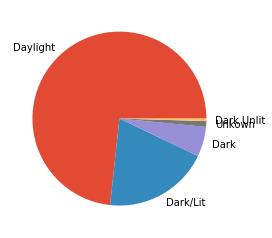

In [26]:
df.Light_Conditions.value_counts()

fig, ax = plt.subplots()

labels = 'Daylight', 'Dark/Lit', 'Dark', 'Unkown', 'Dark Unlit'

ax.pie(df.Light_Conditions.value_counts(), labels=labels)

([<matplotlib.patches.Wedge at 0x10d602780>,
 [Text(-0.6155056304301465, 0.9116758299465815, 'Dry'),
  Text(0.5290062492707899, -0.9644440824809135, 'Wet/Damp'),
  Text(1.0922595916570592, -0.1302650545355683, 'Frost/Ice'),
  Text(1.0994721337834368, -0.03407384676987246, 'Snow'),
  Text(1.0999892284776376, -0.004867980399673757, 'Flood')])

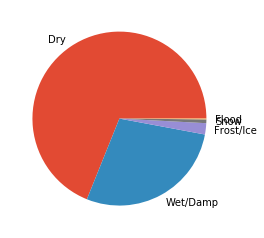

In [27]:
df.Road_Surface_Conditions.value_counts()

fig, ax = plt.subplots()

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax.pie(df.Road_Surface_Conditions.value_counts(), labels=labels)

In [28]:
df.Carriageway_Hazards.value_counts()

None                                       1443157
Other object in carriageway                  11553
Any animal (except a ridden horse)            7904
Pedestrian in carriageway (not injured)       3494
Involvement with previous accident            2237
Dislodged vehicle load in carriageway         1579
Name: Carriageway_Hazards, dtype: int64

([<matplotlib.patches.Wedge at 0x1a21314828>,
 [Text(-0.3966406483511163, 1.0260000955534099, 'Dry'),
  Text(0.23282188250795888, -1.0750785883020135, 'Wet/Damp'),
  Text(1.0782254930017545, -0.21778380619578605, 'Frost/Ice'),
  Text(1.098438877698882, -0.05858354683373705, 'Snow'),
  Text(1.0999492712369607, -0.01056412349791525, 'Flood')])

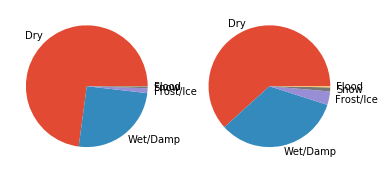

In [29]:
df.Urban_or_Rural_Area.value_counts()

fig, ax = plt.subplots(1,2)

labels = 'Urban', 'Rural', 'Other'

# ax.pie(df.Urban_or_Rural_Area.value_counts(), labels=labels)

urban = df[df["Urban_or_Rural_Area"] == 1]
rural = df[df["Urban_or_Rural_Area"] == 2]

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0].pie(urban.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1].pie(rural.Road_Surface_Conditions.value_counts(), labels=labels)

In [30]:
df.Special_Conditions_at_Site.value_counts()

None                                               1434015
Roadworks                                            16918
Ol or diesel                                          5137
Mud                                                   4543
Road surface defective                                3603
Auto traffic singal out                               2747
Permanent sign or marking defective or obscured       2218
Auto traffic signal partly defective                   757
Name: Special_Conditions_at_Site, dtype: int64

Text(0.5, 1.0, 'Slip Road')

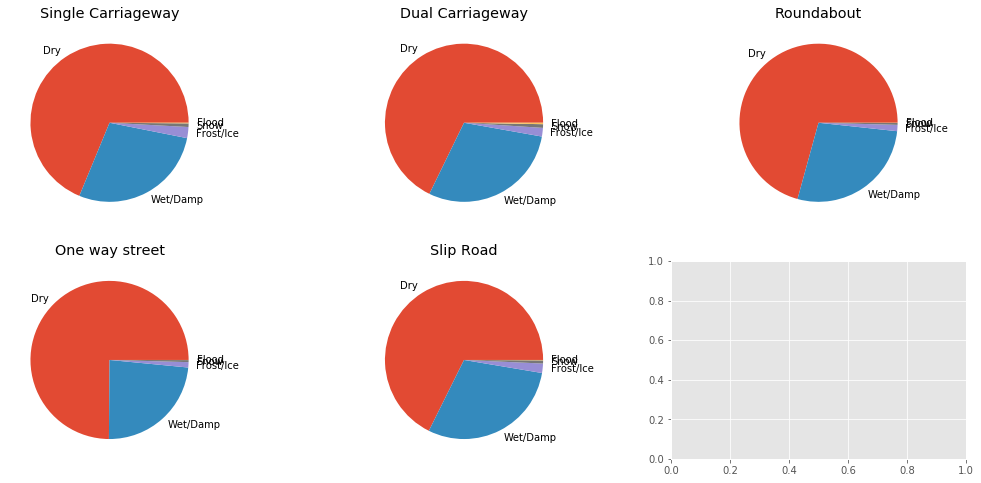

In [31]:
df.Road_Type.value_counts()

single= df[df["Road_Type"] == 'Single carriageway']
dual= df[df["Road_Type"] == 'Dual carriageway']
roundabout= df[df["Road_Type"] == 'Roundabout']
one_way= df[df["Road_Type"] == 'One way street']
slip= df[df["Road_Type"] == 'Slip road']

fig, ax = plt.subplots(2,3,figsize = (18,8))

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0][0].pie(single.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][1].pie(dual.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][2].pie(roundabout.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][0].pie(one_way.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][1].pie(slip.Road_Surface_Conditions.value_counts(), labels=labels)

ax[0][0].set_title('Single Carriageway')
ax[0][1].set_title('Dual Carriageway')
ax[0][2].set_title('Roundabout')
ax[1][0].set_title('One way street')
ax[1][1].set_title('Slip Road')

# Single carriageway    423414
# Dual carriageway       87274
# Roundabout             36637
# One way street         12434
# Slip road               5936
# Unknown                 4316

Text(0.5, 1.0, 'Speed 70, n = 107564')

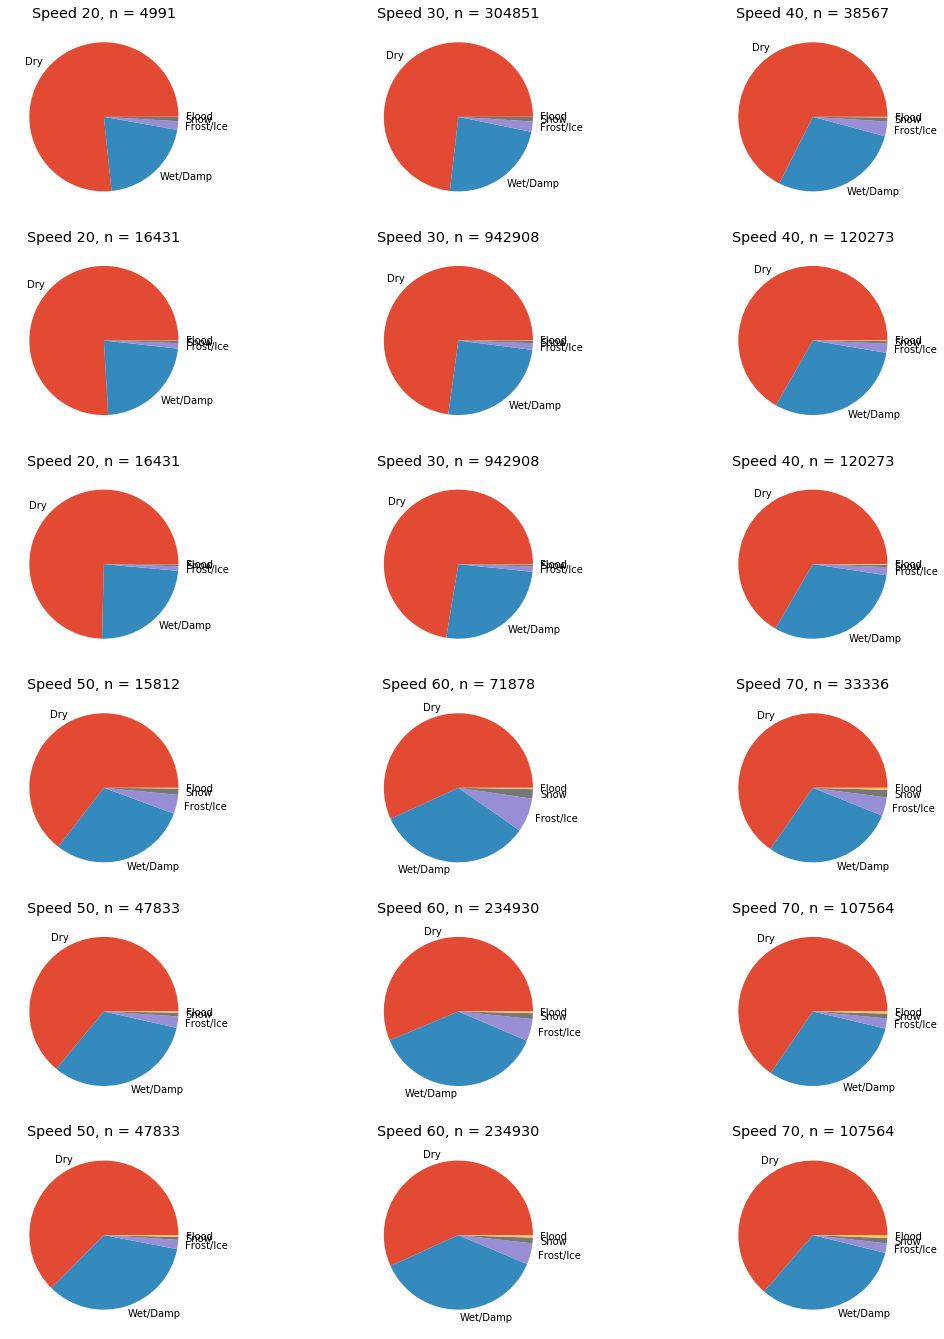

In [32]:
limit20= df2[df2["Speed_limit"] == 20]
limit30= df2[df2["Speed_limit"] == 30]
limit40= df2[df2["Speed_limit"] == 40]
limit50= df2[df2["Speed_limit"] == 50]
limit60= df2[df2["Speed_limit"] == 60]
limit70= df2[df2["Speed_limit"] == 70]
count = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in count.items():
    count[key] = len(df2[df2["Speed_limit"] == key].index)
    

slimit20= df[df["Speed_limit"] == 20]
slimit30= df[df["Speed_limit"] == 30]
slimit40= df[df["Speed_limit"] == 40]
slimit50= df[df["Speed_limit"] == 50]
slimit60= df[df["Speed_limit"] == 60]
slimit70= df[df["Speed_limit"] == 70]
counts = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in counts.items():
    counts[key] = len(df[df["Speed_limit"] == key].index)
    
sslimit20= df3[df3["Speed_limit"] == 20]
sslimit30= df3[df3["Speed_limit"] == 30]
sslimit40= df3[df3["Speed_limit"] == 40]
sslimit50= df3[df3["Speed_limit"] == 50]
sslimit60= df3[df3["Speed_limit"] == 60]
sslimit70= df3[df3["Speed_limit"] == 70]
countss = {20:0,30:0,40:0,50:0,60:0,70:0}

for key, value in countss.items():
    countss[key] = len(df[df["Speed_limit"] == key].index)

fig, ax = plt.subplots(6,3,figsize = (18,24))

labels = 'Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood'

ax[0][0].pie(limit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][1].pie(limit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[0][2].pie(limit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][0].pie(limit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][1].pie(limit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[3][2].pie(limit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[0][0].set_title(f'Speed 20, n = {count[20]}')
ax[0][1].set_title(f'Speed 30, n = {count[30]}')
ax[0][2].set_title(f'Speed 40, n = {count[40]}')
ax[3][0].set_title(f'Speed 50, n = {count[50]}')
ax[3][1].set_title(f'Speed 60, n = {count[60]}')
ax[3][2].set_title(f'Speed 70, n = {count[70]}')

ax[1][0].pie(slimit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][1].pie(slimit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[1][2].pie(slimit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][0].pie(slimit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][1].pie(slimit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[4][2].pie(slimit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[1][0].set_title(f'Speed 20, n = {counts[20]}')
ax[1][1].set_title(f'Speed 30, n = {counts[30]}')
ax[1][2].set_title(f'Speed 40, n = {counts[40]}')
ax[4][0].set_title(f'Speed 50, n = {counts[50]}')
ax[4][1].set_title(f'Speed 60, n = {counts[60]}')
ax[4][2].set_title(f'Speed 70, n = {counts[70]}')

ax[2][0].pie(sslimit20.Road_Surface_Conditions.value_counts(), labels=labels)
ax[2][1].pie(sslimit30.Road_Surface_Conditions.value_counts(), labels=labels)
ax[2][2].pie(sslimit40.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][0].pie(sslimit50.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][1].pie(sslimit60.Road_Surface_Conditions.value_counts(), labels=labels)
ax[5][2].pie(sslimit70.Road_Surface_Conditions.value_counts(), labels=labels)

ax[2][0].set_title(f'Speed 20, n = {countss[20]}')
ax[2][1].set_title(f'Speed 30, n = {countss[30]}')
ax[2][2].set_title(f'Speed 40, n = {countss[40]}')
ax[5][0].set_title(f'Speed 50, n = {countss[50]}')
ax[5][1].set_title(f'Speed 60, n = {countss[60]}')
ax[5][2].set_title(f'Speed 70, n = {countss[70]}')


[Text(0, 0, '20'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '50'),
 Text(0, 0, '60'),
 Text(0, 0, '70')]

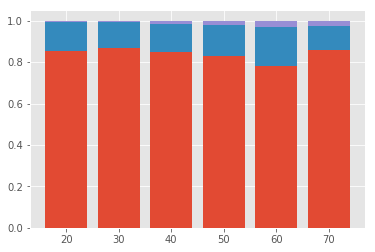

In [33]:
slimit20= df[df["Speed_limit"] == 20]
slimit30= df[df["Speed_limit"] == 30]
slimit40= df[df["Speed_limit"] == 40]
slimit50= df[df["Speed_limit"] == 50]
slimit60= df[df["Speed_limit"] == 60]
slimit70= df[df["Speed_limit"] == 70]

slimit_severities = np.vstack(((slimit20.Accident_Severity.value_counts(),
                              slimit30.Accident_Severity.value_counts(),
                              slimit40.Accident_Severity.value_counts(),
                              slimit50.Accident_Severity.value_counts(),
                              slimit60.Accident_Severity.value_counts(),
                              slimit70.Accident_Severity.value_counts(),)))

slimit_severities = slimit_severities / slimit_severities.sum(axis=1).reshape((6,-1))
slimit_severities

fig, ax = plt.subplots()
ax.bar(range(len(slimit_severities)), slimit_severities[:,0])
ax.bar(range(len(slimit_severities)), slimit_severities[:,1], bottom=slimit_severities[:,0])
ax.bar(range(len(slimit_severities)), slimit_severities[:,2], bottom=slimit_severities[:,0] + slimit_severities[:,1])

ax.set_xticks(np.arange(0,6))                                                                                                                
ax.set_xticklabels(np.arange(2,8)*10)


In [34]:
df.groupby(['Accident_Severity','Speed_limit']).size()

Accident_Severity  Speed_limit
1                  10                  2
                   20                 95
                   30               6272
                   40               1761
                   50               1027
                   60               7380
                   70               2504
2                  10                  2
                   20               2341
                   30             116665
                   40              16279
                   50               7047
                   60              43719
                   70              12861
3                  10                 10
                   20              13995
                   30             819971
                   40             102233
                   50              39759
                   60             183831
                   70              92199
dtype: int64

In [35]:
traffic.head()

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [36]:
traffic.Road.value_counts()

A1         3598
A6         3271
A5         2331
A41        2270
A34        2070
A40        2053
A61        1896
A3         1758
A57        1699
A38        1621
A58        1557
M6         1500
A4         1418
A49        1409
M1         1346
A2         1346
A50        1344
A47        1309
A19        1287
A52        1280
A259       1263
A56        1258
A23        1239
A59        1167
M4         1136
A449       1088
A27        1087
A12        1062
A9         1060
A46        1059
           ... 
A4281         6
A627M         6
A194(M)       6
A627(M)       6
A2500         5
A4971         4
A4510         3
M41           3
A868          3
A1341         2
A1270         2
A2009         2
A1384         2
A6192         2
A5509         2
A2039         2
A3280         2
A48(M)        2
A806          1
A5758         1
A1194         1
A823(M)       1
A14(M)        1
A308M         1
A5042         1
A66(M)        1
A8004         1
A5075         1
A5153         1
A6183         1
Name: Road, Length: 1719

In [37]:
traffic.Northing.value_counts()

190000    707
185000    547
180000    545
170000    530
410000    505
400000    491
175000    452
200000    450
380000    440
390000    428
430000    412
280000    389
178000    383
395000    373
370000    364
360000    358
165000    356
425000    356
176000    353
340000    341
405000    339
300000    337
182000    336
188000    335
172000    334
179000    320
184000    316
440000    302
290000    299
420000    289
         ... 
373772      1
539483      1
211003      1
380862      1
176465      1
346691      1
188924      1
437790      1
172276      1
163494      1
434791      1
580965      1
398635      1
182960      1
395103      1
219522      1
718144      1
157048      1
299195      1
558666      1
421890      1
374193      1
456723      1
609838      1
304362      1
172559      1
204388      1
236557      1
294868      1
303138      1
Name: Northing, Length: 12673, dtype: int64

In [38]:
traffic.Estimation_method_detailed.value_counts()

Estimated using previous year's AADF on this link    159510
Manual count                                          55473
Estimated from nearby links                           15894
Dependent on a neighbouring counted link               6022
Automatic counter                                       913
Name: Estimation_method_detailed, dtype: int64

In [39]:
x = np.arange(4).reshape((2,2))
x

array([[0, 1],
       [2, 3]])

In [40]:
np.transpose(x)

array([[0, 2],
       [1, 3]])

In [41]:
x

array([[0, 1],
       [2, 3]])

In [42]:
traffic.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs', 'AllMotorVehicles',
       'Lat', 'Lon'],
      dtype='object')

In [43]:
traffic['StartJunction'].value_counts()

LA Boundary                                                  23674
LA boundary                                                   1984
A6                                                            1191
A1                                                             828
A61                                                            752
A34                                                            678
A41                                                            678
2                                                              664
M1                                                             638
M6                                                             619
A58                                                            610
A5                                                             604
4                                                              598
A57                                                            595
3                                                             

In [4]:
traffic_locations = traffic[['Lat','Lon']]
traffic_locations.head()

,Lat,Lon
0,53.398531,-1.309655
1,53.760869,-1.513814
2,53.563523,-0.998970
3,53.645893,-1.940967
4,53.731551,-1.607374


In [5]:
df1_locations = df1[['Latitude','Longitude']]
df1_locations.head()

,Latitude,Longitude
0,51.489096,-0.191170
1,51.520075,-0.211708
2,51.525301,-0.206458
3,51.482442,-0.173862
4,51.495752,-0.156618


In [34]:
df_locations = df[['Latitude', 'Longitude']]

In [46]:
df[['Accident_Index','Date','LSOA_of_Accident_Location','Time','Longitude','Latitude']].head()

,Accident_Index,Date,LSOA_of_Accident_Location,Time,Longitude,Latitude
0,200501BS00001,04/01/2005,E01002849,17:42,-0.191170,51.489096
1,200501BS00002,05/01/2005,E01002909,17:36,-0.211708,51.520075
2,200501BS00003,06/01/2005,E01002857,00:15,-0.206458,51.525301
3,200501BS00004,07/01/2005,E01002840,10:35,-0.173862,51.482442
4,200501BS00005,10/01/2005,E01002863,21:13,-0.156618,51.495752


In [47]:
df['Road_Type'].value_counts()


Single carriageway    1100651
Dual carriageway       216873
Roundabout              98517
One way street          30332
Slip road               15357
Unknown                  8223
Name: Road_Type, dtype: int64

In [48]:
# df1['1st_Road_Class'].value_counts()
# df1['1st_Road_Number'].value_counts()
# df1['Road_Type'].value_counts()
# df1['Speed_limit'].value_counts()
# df1['Junction_Detail'].value_counts()
# df1['Junction_Control'].value_counts()
# df1['2nd_Road_Class'].value_counts()
df1['2nd_Road_Number'].value_counts()

 0       443236
-1         5864
 1         1261
 4         1066
 6         1032
 40         787
 38         710
 5          710
 41         705
 7201       687
 3          618
 7302       575
 58         565
 57         561
 235        540
 61         529
 34         524
 10         509
 23         501
 12         492
 25         487
 62         487
 11         480
 406        447
 27         412
 326        396
 112        383
 19         377
 2          372
 14         371
          ...  
 5379         1
 9305         1
 1281         1
 4867         1
 6405         1
 7256         1
 6746         1
 2310         1
 1289         1
 3336         1
 1625         1
 5898         1
 1800         1
 7435         1
 5386         1
 3337         1
 8286         1
 6411         1
 2651         1
 2313         1
 3846         1
 7428         1
 1626         1
 3675         1
 2822         1
 4869         1
 8963         1
 8287         1
 4697         1
 1983         1
Name: 2nd_Road_Number, L

In [16]:
len_df1 = len(df1)

In [49]:
# from scipy.spatial import distance_matrix

# distances = distance_matrix(df1_locations, traffic_locations)

In [50]:
#P_df.to_pickle(\"data/P_df.pkl\")

In [6]:
def euclidean(first, second):
    return np.sqrt(((first - second)**2).sum())

In [52]:
one = df1_locations.loc[0].values

In [53]:
two = traffic_locations.loc[0].values

In [54]:
euclidean(one, two)

2.2129055990086073

In [38]:
'''This section is to be run only once, thereafter use the second snippet to load the data'''
# closest = np.ones((len(df_locations),2)) * 10

# for i, acc in enumerate(df1_locations.values):
#     distances = haversine_distances(acc.reshape((1,-1)),traffic_locations.values)
#     closest[i,0] = distances.min()
#     closest[i,1] = distances.argmin()
            
# np.save('/Users/mac/galvanize/week4/ukAccidentAnalysis/distance_matrix',closest)

'''This section can be run if the above code has ran on your computer'''
closest = np.load('/Users/mac/galvanize/week4/ukAccidentAnalysis/distance_matrix.npy')
df1_closest = closest[:len_df1,1]
df1['Traffic'] = traffic.loc[df1_closest.astype(int)].AllMotorVehicles.values

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


In [28]:
test_distances = distance.cdist(df1_locations.values[0].reshape((1,-1)), traffic_locations, 'euclidean')

In [12]:
test_distances.min()
test_distances.argmin()

190962

In [33]:
df.shape

(1469953, 33)

In [13]:
print("hello")

hello


In [14]:
closest = np.load('/Users/mac/galvanize/week4/ukAccidentAnalysis/distance_matrix.npy')

In [35]:
pwd

'/Users/mac/galvanize/week4/ukAccidentAnalysis'

In [18]:
df1_closest = closest[:len_df1,1]

In [28]:
traffic.loc[df1_closest.astype(int)].AllMotorVehicles.values

array([18394, 96772, 22430, ...,  4926, 32488, 27340])

In [23]:
df1_closest.astype(int)

array([190962, 191377, 190869, ...,  71746,  71845,  71873])

In [82]:
df1['Traffic'] = traffic.loc[df1_closest.astype(int)].AllMotorVehicles.values

In [83]:
df1['CP'] = traffic.loc[df1_closest.astype(int)].CP.values

In [84]:
traffic_casualties = df1.groupby(['CP'])['Number_of_Casualties'].sum().values
traffic_traffics = df1.groupby('CP')['Traffic'].mean().values

In [85]:
CarsPerCasualty = traffic_traffics / traffic_casualties

In [86]:
traffic_casualties.shape
traffic_traffics.shape
CarsPerCasualty.shape

(16977,)

In [87]:
traffic_casualtiesDF = pd.DataFrame({'CP': np.unique(df1['CP'].values), 'Number_of_Casualties': traffic_casualties, 'Traffic': traffic_traffics, 'AADFPerCasualty': CarsPerCasualty})

In [88]:
traffic_casualtiesDF[traffic_casualtiesDF['AADFPerCasualty'] == 0]

,CP,Number_of_Casualties,Traffic,AADFPerCasualty
15104,80206,1,0.0,0.0


In [89]:
nonzerotraffic_casulatiesDF = traffic_casualtiesDF[traffic_casualtiesDF['CP'] != 80206]

In [92]:
nonzerotraffic_casulatiesDF['AADFPerCasualty'].argmin()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


5838

In [93]:
nonzerotraffic_casulatiesDF.loc[5838]

CP                      30980.00000
Number_of_Casualties      863.00000
Traffic                   591.00000
AADFPerCasualty             0.68482
Name: 5838, dtype: float64

In [94]:
traffic[traffic['CP'] == 30980]

,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
70625,2000,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,14,1,0,2,0,0,17,591,56.747775,-3.636758
72815,2001,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,13,1,0,2,0,0,16,602,56.747775,-3.636758
75006,2002,30980,Counted,Manual count,Scotland,Perth and Kinross,A924,PR,300000,762990,...,13,0,0,1,1,3,18,646,56.747775,-3.636758
77197,2003,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,13,0,0,1,1,3,18,678,56.747775,-3.636758
79387,2004,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,12,0,0,1,1,3,17,685,56.747775,-3.636758
81566,2005,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,13,0,0,1,1,3,18,683,56.747775,-3.636758
83775,2006,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,13,0,0,1,1,4,19,695,56.747775,-3.636758
86011,2007,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,13,0,0,1,1,4,19,684,56.747775,-3.636758
88245,2008,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,13,0,0,1,1,5,20,678,56.747775,-3.636758
90478,2009,30980,Estimated,Estimated using previous year's AADF on this link,Scotland,Perth and Kinross,A924,PR,300000,762990,...,13,0,0,1,1,5,20,690,56.747775,-3.636758


In [96]:
df1[df1['CP'] == 30980]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Traffic,CP
104658,200532D007205,502140.0,366900.0,-0.472758,53.189374,32,3,1,1,19/01/2005,...,Fine without high winds,Wet/Damp,Mud,None,2,Yes,E01026190,2005,591,30980
104693,200532D012905,503920.0,365580.0,-0.446557,53.177169,32,3,1,2,01/02/2005,...,Fine without high winds,Wet/Damp,None,None,2,Yes,E01026191,2005,591,30980
104776,200532D047605,502590.0,367040.0,-0.465981,53.190546,32,3,2,1,18/02/2005,...,Fine without high winds,Wet/Damp,None,None,2,No,E01026190,2005,591,30980
104807,200532D051005,502170.0,369980.0,-0.471325,53.217045,32,3,1,1,02/08/2005,...,Fine without high winds,Dry,Ol or diesel,None,2,No,E01026203,2005,591,30980
104892,200532D059505,500730.0,368020.0,-0.493501,53.199707,32,3,1,2,08/09/2005,...,Fine without high winds,Dry,None,None,2,Yes,E01026189,2005,591,30980
104898,200532D060105,502960.0,369550.0,-0.459637,53.213029,32,3,1,1,14/09/2005,...,Fine without high winds,Dry,None,None,2,No,E01026206,2005,591,30980
104913,200532D061705,499320.0,368910.0,-0.514324,53.207970,32,1,2,4,24/09/2005,...,Fine without high winds,Dry,None,None,2,Yes,E01026203,2005,591,30980
105079,200532D078805,500720.0,368030.0,-0.493647,53.199799,32,3,2,2,10/11/2005,...,Fine without high winds,Wet/Damp,None,None,2,Yes,E01026189,2005,591,30980
105094,200532D080805,501370.0,367710.0,-0.484022,53.196800,32,3,1,1,22/11/2005,...,Fine without high winds,Wet/Damp,None,None,2,Yes,E01026189,2005,591,30980
105138,200532D087805,500990.0,367890.0,-0.489651,53.198490,32,3,2,2,09/12/2005,...,Fine without high winds,Wet/Damp,None,None,2,Yes,E01026189,2005,591,30980
